#### 方阵开方

In [1]:
# Bk4_Ch14_01.py

import numpy as np

A = np.matrix([[1.25, -0.75],
               [-0.75, 1.25]])
# 特征值和特征向量
LAMBDA, V = np.linalg.eig(A)

B = V@np.diag(np.sqrt(LAMBDA))@np.linalg.inv(V)

A_reproduced = B@B

print(A_reproduced)

[[ 1.25 -0.75]
 [-0.75  1.25]]


#### 平稳状态

[[0.4]
 [0.6]]


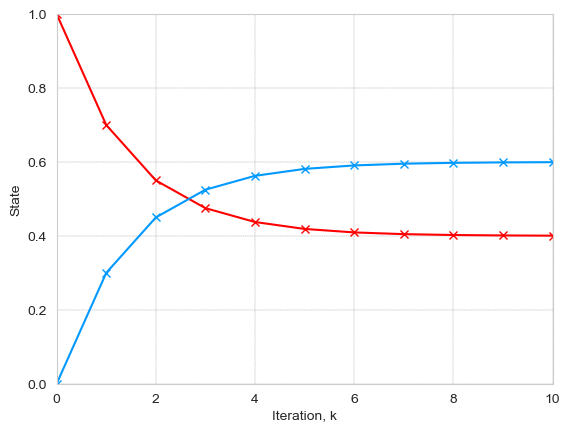

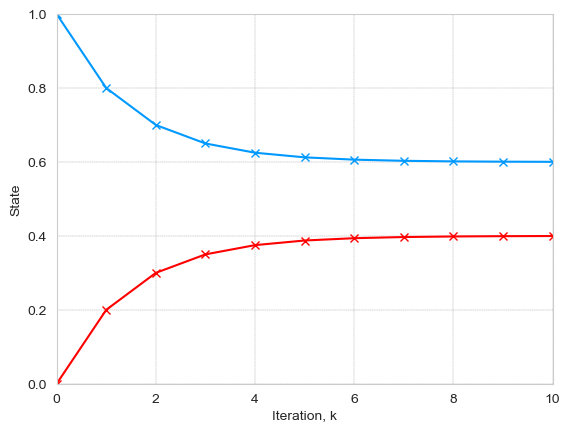

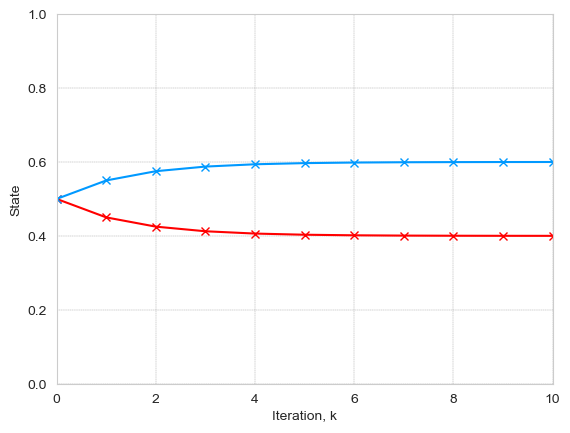

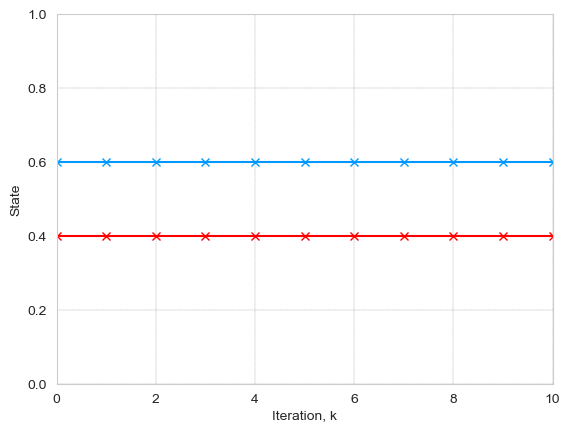

In [6]:
# Bk4_Ch14_02.py

import numpy as np
import matplotlib.pyplot as plt

# transition matrix
T = np.matrix([[0.7, 0.2],
               [0.3, 0.8]])

# steady state
# 计算特征向量
sstate = np.linalg.eig(T)[1][:,1]
# 归一化
sstate = sstate/sstate.sum()
print(sstate)

# initial states
initial_x_array = np.array([[1, 0, 0.5, 0.4],  # Chicken
                            [0, 1, 0.5, 0.6]]) # Rabbit

num_iterations = 10;

for i in np.arange(0,4):
    
    initial_x = initial_x_array[:,i][:, None]
    
    # x_i = np.zeros_like(initial_x)
    x_i = initial_x
    X =   initial_x.T;
    
    # matrix power through iterations
    
    for x in np.arange(0,num_iterations):
        x_i = T@x_i;
        X = np.concatenate([X, x_i.T],axis = 0)
    
    fig, ax = plt.subplots()
    
    itr = np.arange(0,num_iterations+1);
    plt.plot(itr,X[:,0],marker = 'x',color = (1,0,0))
    plt.plot(itr,X[:,1],marker = 'x',color = (0,0.6,1))
    
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    ax.set_xlim(0, num_iterations)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Iteration, k')
    ax.set_ylabel('State')

#### 瑞利商

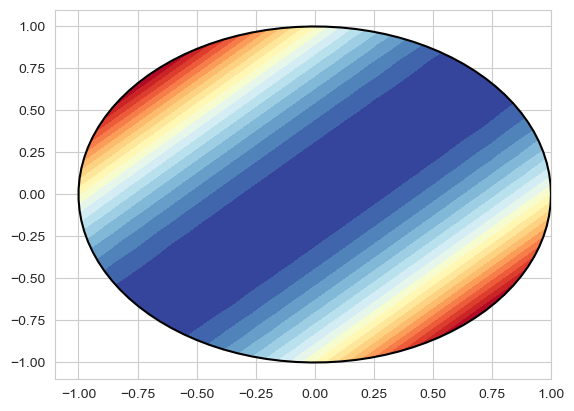

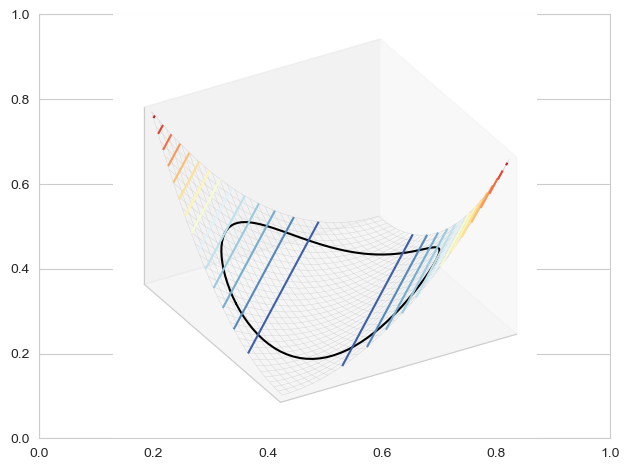

In [3]:
# Bk4_Ch14_03.py

import sympy
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as L


def mesh_circ(c1, c2, r, num):
    # 生成坐标位置
    theta = np.linspace(0, 2 * np.pi, num)
    r = np.linspace(0, r, num)
    theta, r = np.meshgrid(theta, r)
    xx1 = np.cos(theta) * r + c1
    xx2 = np.sin(theta) * r + c2

    return xx1, xx2


#define symbolic vars, function
x1, x2 = sympy.symbols('x1 x2')

A = np.array([[0.5, -0.5],
              [-0.5, 0.5]])

# 计算特征值和特征向量
Lambda, V = L.eig(A)

x = np.array([[x1, x2]]).T

f_x = x.T @ A @ x
f_x = f_x[0][0]
# 转换为可用函数
f_x_fcn = sympy.lambdify([x1, x2], f_x)

xx1, xx2 = mesh_circ(0, 0, 1, 50)

ff_x = f_x_fcn(xx1, xx2)

if Lambda[1] > 0:
    levels = np.linspace(0, Lambda[0], 21)
else:
    levels = np.linspace(Lambda[1], Lambda[0], 21)

t = np.linspace(0, np.pi * 2, 100)

# 2D visualization
fig, ax = plt.subplots()

ax.plot(np.cos(t), np.sin(t), color='k')

cs = plt.contourf(xx1, xx2, ff_x,
                  levels=levels, cmap='RdYlBu_r')
plt.show()
ax.set_aspect('equal')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
clb = fig.colorbar(cs, ax=ax)
clb.set_ticks(levels)

x1_ = np.linspace(-1.2, 1.2, 31)
x2_ = np.linspace(-1.2, 1.2, 31)

xx1_fine, xx2_fine = np.meshgrid(x1_, x2_)

ff_x_fine = f_x_fcn(xx1_fine, xx2_fine)

f_circle = f_x_fcn(np.cos(t), np.sin(t))

# 3D visualization

fig, ax = plt.subplots()
ax = plt.axes(projection='3d')

ax.plot(np.cos(t), np.sin(t), f_circle, color='k')
# circle projected to f(x1,x2)

ax.plot_wireframe(xx1_fine, xx2_fine, ff_x_fine,
                  color=[0.8, 0.8, 0.8],
                  linewidth=0.25)

ax.contour3D(xx1_fine, xx2_fine, ff_x_fine, 15,
             cmap='RdYlBu_r')

ax.view_init(elev=30, azim=60)
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])
ax.set_xlim(xx1_fine.min(), xx1_fine.max())
ax.set_ylim(xx2_fine.min(), xx2_fine.max())
plt.tight_layout()
ax.set_proj_type('ortho')
plt.show()